In [316]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_abline, geom_hline, labs, theme_light

In [317]:
data = pd.read_csv("/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/Hitters.csv")

In [318]:
data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.683230,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.205870,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.750000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.000000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.250000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

There are 59 rows that have a missing value for the Salary variable.

In [320]:
# Filter the dataset to include only rows where 'Salary' is missing
missing_salary = data[data['Salary'].isna()]

missing_salary.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,0.000000
mean,279.677966,70.694915,6.983051,33.813559,32.610169,28.169492,8.033898,2609.186441,697.000000,70.610169,347.983051,328.779661,260.118644,281.033898,54.101695,5.576271,NaN
std,139.477898,39.994075,7.449813,20.921425,21.616578,17.935856,5.483411,2505.342123,687.099501,103.269820,349.489948,377.051724,282.404826,286.401753,71.432315,4.441976,NaN
min,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,28.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,197.500000,45.500000,1.500000,20.000000,18.500000,16.000000,4.000000,704.500000,171.000000,9.500000,71.500000,61.000000,54.000000,103.000000,4.000000,2.000000,NaN
50%,249.000000,61.000000,5.000000,30.000000,29.000000,25.000000,7.000000,1407.000000,361.000000,28.000000,167.000000,185.000000,150.000000,205.000000,23.000000,5.000000,NaN
75%,352.500000,94.000000,9.000000,44.500000,42.500000,37.500000,12.000000,4333.500000,1060.000000,66.500000,608.000000,447.000000,426.500000,342.500000,84.000000,8.000000,NaN
max,580.000000,194.000000,35.000000,91.000000,94.000000,87.000000,23.000000,9778.000000,2732.000000,442.000000,1272.000000,1652.000000,1153.000000,1378.000000,327.000000,20.000000,NaN


In [321]:
# Filter the dataset to include only rows where 'Salary' is not missing
has_salary = data[data['Salary'].notna()]

has_salary.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [322]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


Looking at the comparison between the data that has the Salary variable and the data that is missing the Salary data, those without salary data have a slightly higher average of the number of years in the MLB, 8.03 vs 7.31. However, those that are missing Salary data have lower average number of 1986 season at-bats, hits, home-runs, RBIs and walks, indicating they have had less playing time overall that season. Therefore, one hypothesis would be that this seems to be a group of more experienced players that are towards the end of their careers. If we care moer about active players within the beginning to the height of their careers, then it would be safe to drop these values. 

In [323]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

## Part I: Different Model Specs

### A. Regression without regularization

In [324]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform = "pandas")


In [325]:
lr_fitted = lr_pipeline.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

standardize__CRuns     480.747135
standardize__CAtBat    391.038655
standardize__Hits      337.830479
standardize__AtBat     291.094556
standardize__CRBI      260.689886
standardize__CWalks    213.892259
standardize__Walks     135.073897
dummify__Division_W    116.849246
standardize__CHits      86.687617
standardize__PutOuts    78.761296
dummify__League_N       62.599423
standardize__Runs       60.572479
standardize__Assists    53.732490
standardize__HmRun      37.853837
standardize__RBI        26.994984
dummify__NewLeague_N    24.762325
standardize__Errors     22.160862
standardize__Years      16.693359
standardize__CHmRun     14.181723
dtype: float64

The most impactful variables according to their coefficients are the career runs and at bats, as well as the individual seasons hits and at bats. These make sense as top predictor variables, as players that score lots of runs will be played more, and will be paid more for their performance. 

In [326]:
scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_1 = abs(scores.mean())
print(mse_model_1)

121136.31031816879
121136.31031816879


### B. Ridge regression

In [327]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge())]
)


In [328]:
alphas = {'ridge__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(ridge_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['ridge__alpha']
best_alpha

1

In [329]:
ridge_pipeline.set_params(ridge__alpha=best_alpha)
ridge_pipeline.fit(X, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

standardize__CRuns     320.802717
standardize__Hits      296.801967
standardize__AtBat     271.088165
standardize__CAtBat    225.511649
standardize__CWalks    184.289408
standardize__CRBI      160.409497
standardize__CHits     126.210585
standardize__Walks     124.344012
dummify__Division_W    119.076927
standardize__PutOuts    78.651037
dummify__League_N       58.555947
standardize__Assists    47.493631
standardize__CHmRun     39.055346
standardize__Years      38.619131
standardize__Runs       29.212352
dummify__NewLeague_N    24.027205
standardize__Errors     23.651303
standardize__HmRun      17.973971
standardize__RBI         8.909304
dtype: float64

In [330]:
scores = abs(cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_2 = abs(scores.mean())
print(mse_model_2)

119034.33271954507
119034.33271954507


The most impactful variables according to their coefficients in a ridge regression are Career Runs and Season Hits. This somewhat aligns with our findings from linear regression. Players that score more runs get paid more.

### C. Lasso Regression

In [331]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
)


In [332]:
alphas = {'lasso__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lasso_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['lasso__alpha']
best_alpha

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+07, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e+06, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

1

In [333]:
lasso_pipeline.set_params(lasso__alpha=best_alpha)
lasso_pipeline.fit(X, y)

lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

standardize__CRuns     375.565519
standardize__Hits      304.359509
standardize__AtBat     282.370957
standardize__CRBI      192.610892
standardize__CWalks    189.644642
standardize__CAtBat    162.639794
standardize__Walks     120.695275
dummify__Division_W    114.412951
standardize__PutOuts    78.760366
standardize__Assists    41.996680
dummify__League_N       35.826072
standardize__Years      34.948148
standardize__Runs       24.966507
standardize__Errors     18.479378
standardize__CHmRun     14.225993
standardize__HmRun      11.127022
standardize__CHits       0.000000
standardize__RBI         0.000000
dummify__NewLeague_N     0.000000
dtype: float64

The most important variables based on their coefficients in a Lasso regression are Career Runs and Season Hits, which was the same as the Ridge regression.

In [334]:
scores = abs(cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_3 = abs(scores.mean())
print(mse_model_3)

119761.58740741301
119761.58740741301


/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.815e+03, tolerance: 4.281e+03


### D. Elastic Net

In [335]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

In [336]:
param_grid = {
    'elastic_net__alpha': [0.001,0.01,0.1,1,10],
    'elastic_net__l1_ratio': [0.10,0.25,0.5,0.75,0.90, 1]}

gscv = GridSearchCV(elastic_pipeline, param_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+07, tolerance: 4.708e+03


/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.138e+06, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+07, tolerance: 4.137e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.702e+06, tolerance: 4.281e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.553e+06, tolerance: 4.558e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+05, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+04, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.923e+04, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.726e+05, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.815e+03, tolerance: 4.281e+03


{'mean_fit_time': array([0.0092298 , 0.00791478, 0.00788817, 0.01620898, 0.0101903 , 0.00788999, 0.00777874, 0.00743442, 0.00747614,
        0.00811758, 0.00780516, 0.00795045, 0.00420227, 0.00443344, 0.00450521, 0.00482235, 0.00573001, 0.00790353,
        0.00352259, 0.00352173, 0.00366325, 0.00372567, 0.00391374, 0.00680714, 0.0035604 , 0.00355034, 0.00348001,
        0.0035006 , 0.00353041, 0.00406938]),
 'std_fit_time': array([1.18140529e-03, 1.19241901e-04, 1.64215587e-04, 1.16355330e-02, 4.04786338e-03, 2.08402388e-04, 2.41895716e-04,
        6.37595338e-04, 3.11777357e-04, 1.07340228e-04, 6.23500642e-05, 2.47097669e-04, 1.59630140e-04, 2.72544052e-04,
        1.26912734e-04, 2.58455795e-04, 1.31950983e-04, 1.63055399e-04, 1.81413823e-05, 2.34240157e-05, 1.66132037e-04,
        4.60311139e-05, 5.85587482e-05, 8.24183632e-04, 7.42444184e-05, 1.12446998e-04, 7.99835739e-05, 7.38599979e-05,
        9.66622665e-05, 2.05251086e-04]),
 'mean_score_time': array([0.00228033, 0.00181236, 

In [337]:
gscv_fitted.cv_results_['mean_test_score']

array([-119947.44472236, -120056.4506777 , -120281.59492196, -120582.17201368, -120812.98081239, -120994.17981481,
       -118802.21070273, -118857.24729517, -119009.71764424, -119340.06138206, -119868.78987113, -120964.76468618,
       -119562.32426114, -119415.17092853, -119116.47317065, -118776.33613165, -118794.04961668, -120682.25263745,
       -122468.17537564, -122065.01283502, -121363.37695974, -120643.0417211 , -119784.09674844, -119761.58740741,
       -147982.88325603, -144263.49195872, -137072.72527313, -128843.18232857, -123843.81267153, -121828.14133339])

In [338]:
degrees = pd.DataFrame(gscv_fitted.cv_results_["params"])
results = degrees.assign(scores=gscv_fitted.cv_results_['mean_test_score'])
results.sort_values(by='scores', ascending=False)

,elastic_net__alpha,elastic_net__l1_ratio,scores
15,0.100000,0.750000,-118776.336132
16,0.100000,0.900000,-118794.049617
6,0.010000,0.100000,-118802.210703
7,0.010000,0.250000,-118857.247295
8,0.010000,0.500000,-119009.717644
14,0.100000,0.500000,-119116.473171
9,0.010000,0.750000,-119340.061382
13,0.100000,0.250000,-119415.170929
12,0.100000,0.100000,-119562.324261
23,1.000000,1.000000,-119761.587407


In [339]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha = 0.1, l1_ratio = 0.75))]
)
elastic_fitted = elastic_pipeline.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__Hits      183.897711
standardize__AtBat     168.727716
standardize__CRuns     147.091147
dummify__Division_W    115.336949
standardize__CWalks    114.207778
standardize__CHits     105.613503
standardize__CRBI      100.065319
standardize__Walks      92.183593
standardize__PutOuts    76.451824
standardize__CHmRun     59.297170
standardize__Years      51.391664
dummify__League_N       43.215713
standardize__CAtBat     42.377848
standardize__Assists    32.982967
standardize__Errors     24.771420
standardize__Runs       14.745185
standardize__RBI        12.708808
dummify__NewLeague_N    10.767257
standardize__HmRun       6.487913
dtype: float64

The most important variables according to the coefficients in a ElasticNet regression are season Hits and At Bats. This somewhat aligns with our findings from the models, with Season Hits moving up from second to first.

In [340]:
scores = abs(cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_4 = abs(scores.mean())
print(mse_model_4)

118776.33613164835
118776.33613164835


## Part II. Variable Selection

In [341]:
# Used ChatGPT to make this table of the coefficents 

pd.set_option('display.float_format', '{:.6f}'.format)
variable_df = pd.DataFrame(lr_coeff_series).reset_index()
variable_df = variable_df.rename({"index": "labels", 0: "linear_values"}, axis=1)

variable_df['ridge_values'] = ridge_coefs
variable_df['lasso_values'] = lasso_coefs
variable_df['elastic_values'] = elastic_coefs

variable_df['average_values'] = variable_df[['linear_values', 'ridge_values', 'lasso_values', 'elastic_values']].abs().mean(axis=1)
variable_df = variable_df.sort_values(by="average_values", ascending=False).reset_index(drop=True)

variable_df

,labels,linear_values,ridge_values,lasso_values,elastic_values,average_values
0,standardize__CRuns,480.747135,320.802717,375.565519,147.091147,331.051629
1,standardize__Hits,337.830479,296.801967,304.359509,183.897711,280.722416
2,standardize__AtBat,-291.094556,-271.088165,-282.370957,-168.727716,253.320348
3,standardize__CAtBat,-391.038655,-225.511649,-162.639794,-42.377848,205.391986
4,standardize__CRBI,260.689886,160.409497,192.610892,100.065319,178.443898
5,standardize__CWalks,-213.892259,-184.289408,-189.644642,-114.207778,175.508522
6,standardize__Walks,135.073897,124.344012,120.695275,92.183593,118.074194
7,dummify__Division_W,-116.849246,-119.076927,-114.412951,-115.336949,116.419018
8,standardize__CHits,86.687617,126.210585,0.000000,105.613503,79.627926
9,standardize__PutOuts,78.761296,78.651037,78.760366,76.451824,78.156131


### Linear Regression with Only Best Variable (CRuns)

In [342]:
X = data[["CRuns"]]
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

standardize__CRuns   253.351392
dtype: float64

In [343]:
scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_5 = abs(scores.mean())
print(mse_model_5)

143812.9359162973
143812.9359162973


### Linear Regression with 5 Best Variables

In [344]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

standardize__CRuns    456.319655
standardize__Hits     327.135303
standardize__CAtBat   234.721048
standardize__AtBat    196.706159
standardize__CWalks     4.068062
dtype: float64

In [345]:
scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_6 = abs(scores.mean())
print(mse_model_6)

127649.37020397605
127649.37020397605


### Linear Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [346]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lr_pipeline = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing_2'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

interaction_1__standardize__CRuns                        577.187656
interaction_2__standardize__Hits                         447.404648
interaction_1__standardize__CRuns dummify__Division_W    380.119079
interaction_4__standardize__CAtBat dummify__Division_W   369.194999
interaction_2__standardize__Hits dummify__Division_W     358.092058
interaction_3__standardize__AtBat dummify__Division_W    340.635609
interaction_4__standardize__CAtBat                       324.790653
interaction_3__standardize__AtBat                        324.539068
interaction_5__standardize__CWalks dummify__Division_W    85.187232
interaction_3__dummify__Division_W                        23.590543
interaction_4__dummify__Division_W                        23.590543
interaction_5__dummify__Division_W                        23.590543
interaction_2__dummify__Division_W                        23.590543
interaction_1__dummify__Division_W                        23.590543
interaction_5__standardize__CWalks              

In [347]:
scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_7 = abs(scores.mean())
print(mse_model_7)

132104.08771759566
132104.08771759566


### Ridge Regression with Only Best Variable (CRuns)

In [348]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge())]
).set_output(transform="pandas")

alphas = {'ridge__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(ridge_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['ridge__alpha']
best_alpha

ridge_pipeline.set_params(ridge__alpha=best_alpha)
ridge_pipeline.fit(X, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted


standardize__CRuns   244.071121
dtype: float64

In [349]:
scores = abs(cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_8 = abs(scores.mean())
print(mse_model_8)

143658.5173685888
143658.5173685888


### Ridge Regression with 5 Best Variables

In [350]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge", Ridge())]
).set_output(transform="pandas")

alphas = {'ridge__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(ridge_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['ridge__alpha']
best_alpha

ridge_pipeline.set_params(ridge__alpha=best_alpha)
ridge_pipeline.fit(X, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted


standardize__CRuns    380.505983
standardize__Hits     307.149947
standardize__AtBat    173.562058
standardize__CAtBat   171.164182
standardize__CWalks     7.992500
dtype: float64

In [351]:
scores = abs(cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_9 = abs(scores.mean())
print(mse_model_9)

126800.37050367214
126800.37050367214


### Ridge Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [352]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ridge_pipeline = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("ridge", Ridge())]
).set_output(transform="pandas")

alphas = {'ridge__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(ridge_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['ridge__alpha']
best_alpha

ridge_pipeline.set_params(ridge__alpha=best_alpha)
ridge_pipeline.fit(X, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

feature_names = ridge_pipeline.named_steps['preprocessing_2'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

interaction_2__standardize__Hits                         189.861011
interaction_1__standardize__CRuns                        185.877847
interaction_5__standardize__CWalks dummify__Division_W    74.985983
interaction_3__standardize__AtBat                         47.186519
interaction_5__standardize__CWalks                        46.525020
interaction_2__standardize__Hits dummify__Division_W      35.951066
interaction_4__standardize__CAtBat                        30.391897
interaction_5__dummify__Division_W                        25.393689
interaction_4__dummify__Division_W                        25.393689
interaction_2__dummify__Division_W                        25.393689
interaction_3__dummify__Division_W                        25.393689
interaction_1__dummify__Division_W                        25.393689
interaction_1__standardize__CRuns dummify__Division_W     13.193722
interaction_3__standardize__AtBat dummify__Division_W      6.121356
interaction_4__standardize__CAtBat dummify__Divi

In [353]:
scores = abs(cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_10 = abs(scores.mean())
print(mse_model_10)

127601.78765366765
127601.78765366765


### Lasso Regression with Only Best Variable (CRuns)

In [354]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
).set_output(transform="pandas")

alphas = {'lasso__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lasso_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['lasso__alpha']
print(best_alpha)

lasso_pipeline.set_params(lasso__alpha=best_alpha)
lasso_pipeline.fit(X, y)

lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

10
10


standardize__CRuns   243.351392
dtype: float64

In [355]:
scores = abs(cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_11 = abs(scores.mean())
print(mse_model_11)

143793.4491585397
143793.4491585397


### Lasso Regression with 5 Best Variables

In [356]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
).set_output(transform="pandas")

alphas = {'lasso__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lasso_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['lasso__alpha']
print(best_alpha)

lasso_pipeline.set_params(lasso__alpha=best_alpha)
lasso_pipeline.fit(X, y)

lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

1
1


standardize__CRuns    392.706162
standardize__Hits     302.974589
standardize__CAtBat   175.400706
standardize__AtBat    170.154812
standardize__CWalks     0.000000
dtype: float64

In [357]:
scores = abs(cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_12 = abs(scores.mean())
print(mse_model_12)

127187.74346481936
127187.74346481936


### Lasso Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [358]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lasso_pipeline = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("lasso", Lasso())]
).set_output(transform="pandas")

alphas = {'lasso__alpha': [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lasso_pipeline, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['lasso__alpha']
print(best_alpha)

lasso_pipeline.set_params(lasso__alpha=best_alpha)
lasso_pipeline.fit(X, y)

lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

feature_names = lasso_pipeline.named_steps['preprocessing_2'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e+06, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.816e+05, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

10
10


interaction_1__standardize__CRuns                        238.146432
interaction_2__standardize__Hits                         128.120499
interaction_1__dummify__Division_W                        92.304746
interaction_5__standardize__CWalks dummify__Division_W    41.804882
interaction_1__standardize__CRuns dummify__Division_W     10.827567
interaction_2__dummify__Division_W                         0.004182
interaction_4__standardize__CAtBat                         0.000000
interaction_5__dummify__Division_W                         0.000000
interaction_5__standardize__CWalks                         0.000000
interaction_5__1                                           0.000000
interaction_4__standardize__CAtBat dummify__Division_W     0.000000
interaction_4__dummify__Division_W                         0.000000
interaction_1__1                                           0.000000
interaction_4__1                                           0.000000
interaction_3__standardize__AtBat dummify__Divis

In [359]:
scores = abs(cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_13 = abs(scores.mean())
print(mse_model_13)

126681.92323543914126681.92323543914

### Elastic Net Regression with Only Best Variable (CRuns)

In [360]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

param_grid = {
    'elastic_net__alpha': [0.001,0.01,0.1,1,10],
    'elastic_net__l1_ratio': [0.10,0.25,0.5,0.75,0.90, 1]}

gscv = GridSearchCV(elastic_pipeline, param_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)
gscv_fitted.cv_results_
gscv_fitted.cv_results_['mean_test_score']
degrees = pd.DataFrame(gscv_fitted.cv_results_["params"])
results = degrees.assign(scores=gscv_fitted.cv_results_['mean_test_score'])
results.sort_values(by='scores', ascending=False)

,elastic_net__alpha,elastic_net__l1_ratio,scores
14,0.100000,0.500000,-143655.076048
13,0.100000,0.250000,-143687.045561
15,0.100000,0.750000,-143693.049732
12,0.100000,0.100000,-143735.873327
16,0.100000,0.900000,-143753.808898
6,0.010000,0.100000,-143759.624708
7,0.010000,0.250000,-143767.677667
8,0.010000,0.500000,-143781.813828
29,10.000000,1.000000,-143793.449159
9,0.010000,0.750000,-143796.854355


In [361]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha = 0.1, l1_ratio = 0.5))]
)
elastic_fitted = elastic_pipeline.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__CRuns   241.239421
dtype: float64

In [362]:
scores = abs(cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_14 = abs(scores.mean())
print(mse_model_14)

143655.07604766646
143655.07604766646


### Elastic Net Regression with 5 Best Variables

In [363]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

param_grid = {
    'elastic_net__alpha': [0.001,0.01,0.1,1,10],
    'elastic_net__l1_ratio': [0.10,0.25,0.5,0.75,0.90, 1]}

gscv = GridSearchCV(elastic_pipeline, param_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)
gscv_fitted.cv_results_
gscv_fitted.cv_results_['mean_test_score']
degrees = pd.DataFrame(gscv_fitted.cv_results_["params"])
results = degrees.assign(scores=gscv_fitted.cv_results_['mean_test_score'])
results.sort_values(by='scores', ascending=False)

,elastic_net__alpha,elastic_net__l1_ratio,scores
6,0.010000,0.100000,-126647.185500
16,0.100000,0.900000,-126660.839568
7,0.010000,0.250000,-126666.328325
8,0.010000,0.500000,-126777.955014
9,0.010000,0.750000,-127054.757580
15,0.100000,0.750000,-127185.160062
23,1.000000,1.000000,-127187.743465
10,0.010000,0.900000,-127355.296870
0,0.001000,0.100000,-127385.283794
1,0.001000,0.250000,-127424.546052


In [364]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha = 0.01, l1_ratio = 0.1))]
)
elastic_fitted = elastic_pipeline.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__CRuns    316.227596
standardize__Hits     283.204528
standardize__AtBat    147.074716
standardize__CAtBat   117.160190
standardize__CWalks    17.953457
dtype: float64

In [365]:
scores = abs(cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_15 = abs(scores.mean())
print(mse_model_15)

126647.18550047581
126647.18550047581


### Elastic Net Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [366]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

elastic_pipeline = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("elastic_net", ElasticNet())]
)

param_grid = {
    'elastic_net__alpha': [0.001,0.01,0.1,1,10],
    'elastic_net__l1_ratio': [0.10,0.25,0.5,0.75,0.90, 1]}

gscv = GridSearchCV(elastic_pipeline, param_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)
gscv_fitted.cv_results_
gscv_fitted.cv_results_['mean_test_score']
degrees = pd.DataFrame(gscv_fitted.cv_results_["params"])
results = degrees.assign(scores=gscv_fitted.cv_results_['mean_test_score'])
results.sort_values(by='scores', ascending=False)

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+07, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.203e+06, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+07, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.740e+06, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.318e+06, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.342e+06, tolerance: 4.137e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+05, tolerance: 4.708e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e+05, tolerance: 3.606e+03
/Users/Steven/Documents/Documents - MacBook Pro/Cal Poly/MSBA/Fall 2024/GSB-544/Labs/Lab-6/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not con

,elastic_net__alpha,elastic_net__l1_ratio,scores
29,10.000000,1.000000,-126681.923235
22,1.000000,0.900000,-126921.525961
21,1.000000,0.750000,-127109.342184
12,0.100000,0.100000,-127185.387983
13,0.100000,0.250000,-127289.184085
14,0.100000,0.500000,-127552.455378
15,0.100000,0.750000,-128043.371711
20,1.000000,0.500000,-128440.615439
16,0.100000,0.900000,-128805.358346
6,0.010000,0.100000,-128934.794679


In [367]:
elastic_pipeline = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("elastic_net", ElasticNet(alpha = 10, l1_ratio = 1))]
)

elastic_fitted = elastic_pipeline.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = elastic_pipeline.named_steps['preprocessing_2'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

interaction_1__standardize__CRuns                        238.146432
interaction_2__standardize__Hits                         128.120499
interaction_1__dummify__Division_W                        92.304746
interaction_5__standardize__CWalks dummify__Division_W    41.804882
interaction_1__standardize__CRuns dummify__Division_W     10.827567
interaction_2__dummify__Division_W                         0.004182
interaction_4__standardize__CAtBat                         0.000000
interaction_5__dummify__Division_W                         0.000000
interaction_5__standardize__CWalks                         0.000000
interaction_5__1                                           0.000000
interaction_4__standardize__CAtBat dummify__Division_W     0.000000
interaction_4__dummify__Division_W                         0.000000
interaction_1__1                                           0.000000
interaction_4__1                                           0.000000
interaction_3__standardize__AtBat dummify__Divis

In [368]:
scores = abs(cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
mse_model_16 = abs(scores.mean())
print(mse_model_16)

126681.92323543914
126681.92323543914


In [369]:
# I used ChatGPT to Help me make a table of all the MSEs

mse_values = {}

# Loop through the range of models (1 to 16 inclusive)
for i in range(1, 17):  # Adjust the range to include 16 models
    model_name = f'mse_model_{i}'
    mse_values[model_name] = locals()[model_name]

# Create a DataFrame from the dictionary
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])

sorted_mse_df = mse_df.sort_values(by='MSE')
sorted_mse_df

,Model,MSE
3,mse_model_4,118776.336132
1,mse_model_2,119034.332720
2,mse_model_3,119761.587407
0,mse_model_1,121136.310318
14,mse_model_15,126647.185500
12,mse_model_13,126681.923235
15,mse_model_16,126681.923235
8,mse_model_9,126800.370504
11,mse_model_12,127187.743465
9,mse_model_10,127601.787654


The first 4 models were the original ones that included all variables in the dataset. So out of the new models, Model 15 has the highest MSE. This was the Elastic Net Regression with the 5 best numeric variables. Model 4 performed the best out of all the models, which was the Elastic Net Regression with all variables.

## Part III. Discussion

### A. Ridge 

Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

The coefficients from my ridge models were smaller than the coefficients from my ordinary regression models. This makes sense because Ridge regression produces smaller coefficients for variables because it includes an additional penalty that discourages large coefficients by minimizing the sum of their squares.

### B. LASSO 

Compare your LASSO model in I with your three LASSO models in II. Did you get the same lambda results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

The optimal lambda value in my first LASSO model differed from the later models. This makes sense because LASSO aims to prevent overfitting, so it should change as the predictor variables change. Each of the MSEs from my LASSO models differed, which makes sense because different sets of predictor variables will predict the dependent variable differently.

### C. Elastic Net

Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

The MSEs for Elastic Net models was always better or the same as Ridge and LASSO models with the same predictors. This makes sense because Elastic Net includes both Ridge and Lasso and adjusts to find the optimal combination of the two to improve MSE. So this combination should at least match or be better than the MSE for the same LASSO or Ridge model. 

## Part IV: Final Model

In [370]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop= "first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha = 0.1, l1_ratio = 0.75))]
)
elastic_fitted = elastic_pipeline.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_net'].coef_

feature_names = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__Hits      183.897711
standardize__AtBat     168.727716
standardize__CRuns     147.091147
dummify__Division_W    115.336949
standardize__CWalks    114.207778
standardize__CHits     105.613503
standardize__CRBI      100.065319
standardize__Walks      92.183593
standardize__PutOuts    76.451824
standardize__CHmRun     59.297170
standardize__Years      51.391664
dummify__League_N       43.215713
standardize__CAtBat     42.377848
standardize__Assists    32.982967
standardize__Errors     24.771420
standardize__Runs       14.745185
standardize__RBI        12.708808
dummify__NewLeague_N    10.767257
standardize__HmRun       6.487913
dtype: float64

In [371]:
y_preds = elastic_fitted.predict(X)

data['y_preds'] = y_preds
data['residuals'] = data['Salary'] - data['y_preds']

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


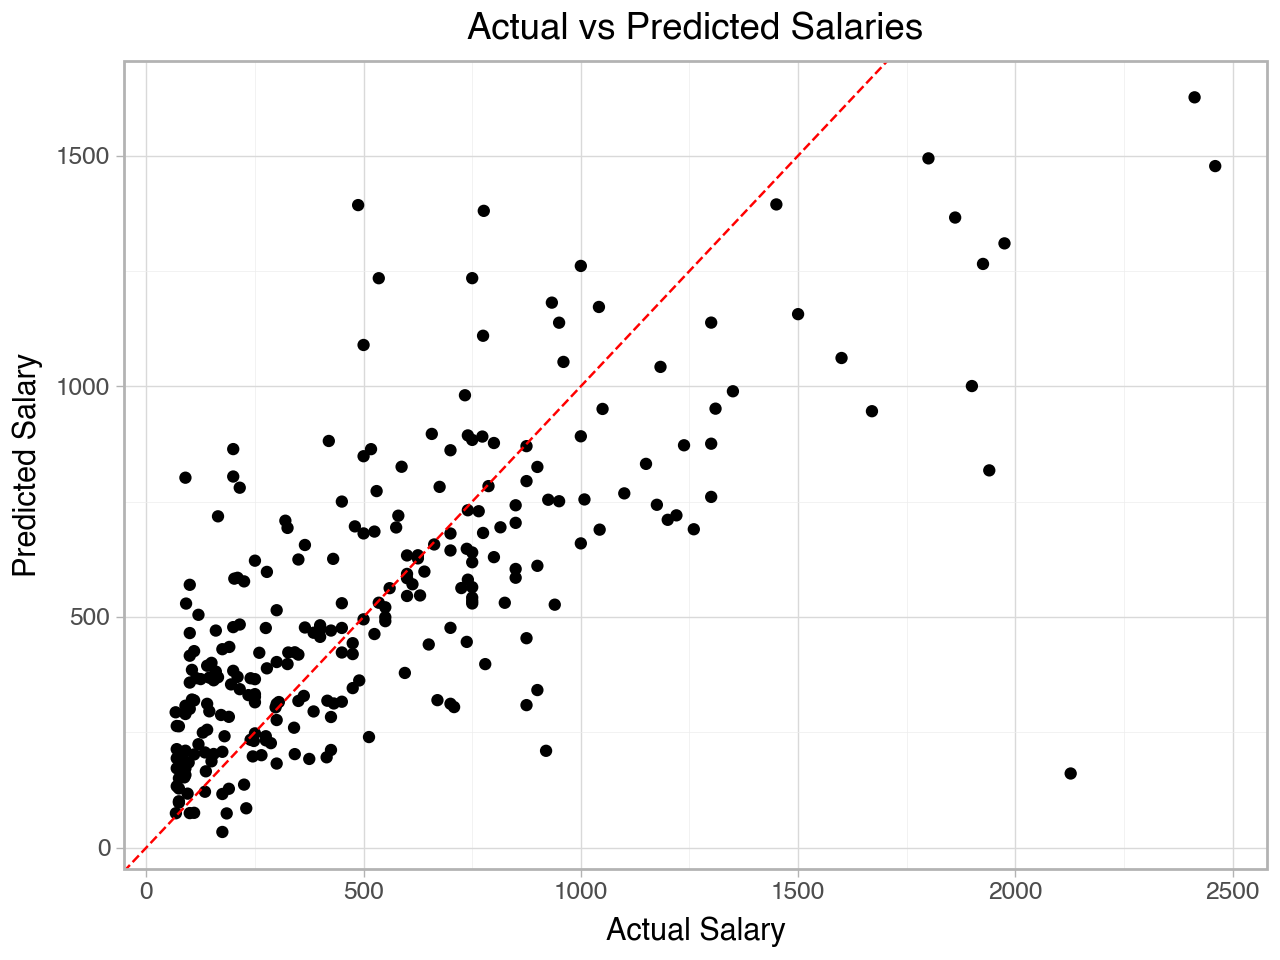

In [372]:
# Utilized ChatGPT to create a graph 
(ggplot(data, aes(x = "Salary",y = "y_preds")) +
    geom_point() +
    geom_abline(intercept=0, slope=1, color='red', linetype='dashed') +
    labs(title='Actual vs Predicted Salaries', x='Actual Salary', y='Predicted Salary') + 
    theme_light()
 )

This scatter plot visualizations the actual vs predicted Salary from Model 4. It does a pretty good job at predicting the Salary of baseball players in the 1989 season. The dotted line displays where the points would be if the model perfectly predicted the acutal salary of the player. The points generally follow the dashed line, but it is not perfect especially as actual salary increases.

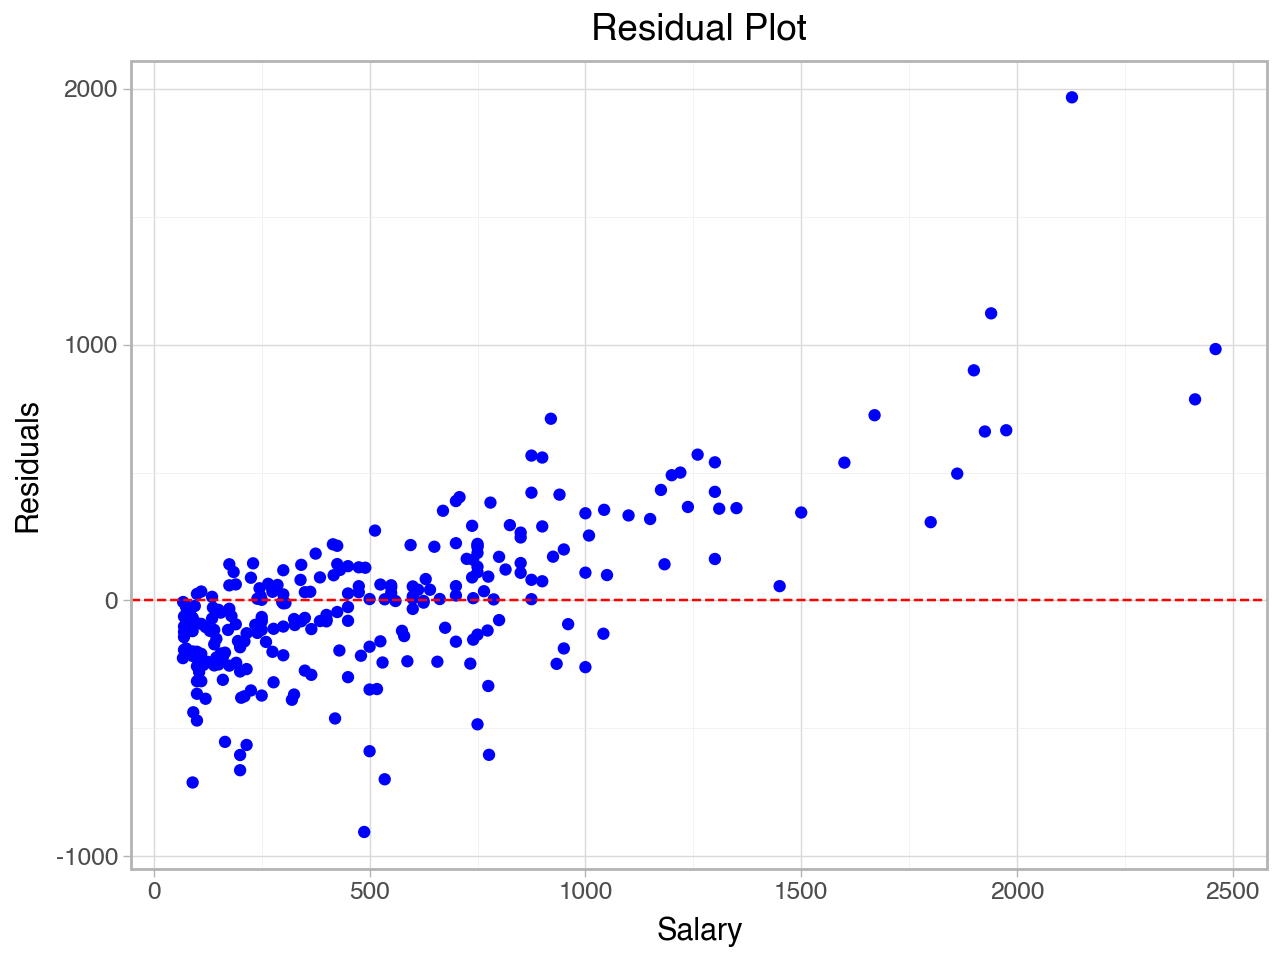

In [373]:
(ggplot(data, aes(x='Salary', y='residuals')) +
    geom_point(color='blue') +
    geom_hline(yintercept=0, color='red', linetype='dashed') +
    labs(title='Residual Plot', x='Salary', y='Residuals') +
    theme_light()
)

Looking at the residuals plot I can see that they are not consistently grouped around 0 for the entire x-axis. Like I noticed in the last plot, the residuals become greater as Salary increases, showing that the model is less accurate for higher salaries. There might be a lack of data for higher salaries which causes this. 